<a href="https://colab.research.google.com/github/Shivam4681/DeepLearning/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Files

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 2: Read The Dataset

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Shivam4681/DeepLearning/main/Datasets.txt/PowerPlant.csv'
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Step 3: Perform Basic Data Quality Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9563,False,False,False,False,False
9564,False,False,False,False,False
9565,False,False,False,False,False
9566,False,False,False,False,False


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

41

In [7]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [8]:
df = df.drop_duplicates(keep='first')
df.shape

(9527, 5)

## Seprate X And Y

In [9]:
x = df.drop(columns=['PE'])
y = df['PE']

In [10]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

## Step 4: Process X Using Pipeline

In [12]:
x.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

There is no any Categorical value Thats way we perform only numerical value.<br>
numerial = StabdardScaler <br>
categorical = OrdibalEncoder

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')

In [15]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


mewn is 0 <br>
Standard Deviation is 1

## Applay Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [17]:
x_train.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [18]:
y_train.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [19]:
# Unseen Data
x_test.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [20]:
y_test.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [21]:
x_train.shape

(7621, 4)

In [22]:
x_test.shape

(1906, 4)

In [23]:
x_train.shape[1]

4

## Step 5: Built The Neural Network

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [25]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(x_train.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))


In [26]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [27]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 7s 9ms/step - loss: 204574.7031 - mae: 451.9373 - val_loss: 199332.9531 - val_mae: 446.0563
Epoch 2/60
239/239 [==============================] - 2s 8ms/step - loss: 181076.5312 - mae: 424.7098 - val_loss: 152773.4375 - val_mae: 389.9915
Epoch 3/60
239/239 [==============================] - 2s 6ms/step - loss: 113254.2812 - mae: 331.1805 - val_loss: 71923.1797 - val_mae: 259.4123
Epoch 4/60
239/239 [==============================] - 1s 5ms/step - loss: 45867.8984 - mae: 193.2229 - val_loss: 27433.2227 - val_mae: 141.4072
Epoch 5/60
239/239 [==============================] - 1s 6ms/step - loss: 22350.2539 - mae: 127.2221 - val_loss: 18425.1895 - val_mae: 115.7400
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 16572.9844 - mae: 110.0061 - val_loss: 14166.8818 - val_mae: 101.6635
Epoch 7/60
239/239 [==============================] - 1s 3ms/step - loss: 12374.4131 - mae: 95.2857 - val_loss: 10202.3740 - val_ma

In [28]:
hist.history["loss"]

[204574.703125,
 181076.53125,
 113254.28125,
 45867.8984375,
 22350.25390625,
 16572.984375,
 12374.4130859375,
 8545.4365234375,
 5341.00439453125,
 2991.0654296875,
 1547.4962158203125,
 808.6338500976562,
 472.0557556152344,
 312.5783386230469,
 225.24534606933594,
 171.04100036621094,
 134.78512573242188,
 108.50296783447266,
 88.93958282470703,
 74.78832244873047,
 63.748470306396484,
 54.90773010253906,
 47.9183235168457,
 42.291160583496094,
 37.63419723510742,
 33.995121002197266,
 30.939783096313477,
 28.65682601928711,
 26.85236167907715,
 25.539247512817383,
 24.52607536315918,
 23.569271087646484,
 22.870328903198242,
 22.46897315979004,
 22.170230865478516,
 21.759977340698242,
 21.536396026611328,
 21.37952423095703,
 21.13043975830078,
 21.169830322265625,
 20.790708541870117,
 20.72780990600586,
 20.82364845275879,
 20.68050193786621,
 20.559974670410156,
 20.619098663330078,
 20.619976043701172,
 20.436304092407227,
 20.465444564819336,
 20.46918487548828,
 20.3272609

In [29]:
hist.history['val_loss']

[199332.953125,
 152773.4375,
 71923.1796875,
 27433.22265625,
 18425.189453125,
 14166.8818359375,
 10202.3740234375,
 6704.52294921875,
 3943.58935546875,
 2087.33349609375,
 1068.6201171875,
 589.4091186523438,
 370.5330505371094,
 257.71063232421875,
 193.2242889404297,
 150.82554626464844,
 118.94949340820312,
 96.3116455078125,
 80.05256652832031,
 67.5634536743164,
 58.05079650878906,
 50.323665618896484,
 44.5059928894043,
 39.41830062866211,
 35.34755325317383,
 32.12773513793945,
 29.59295082092285,
 27.63719367980957,
 26.07926368713379,
 24.986400604248047,
 24.2219181060791,
 23.51490020751953,
 22.906055450439453,
 22.35220718383789,
 21.895753860473633,
 21.64456558227539,
 21.4980411529541,
 21.41050148010254,
 20.90011978149414,
 21.086885452270508,
 20.677743911743164,
 21.035493850708008,
 20.89687728881836,
 20.527585983276367,
 20.478160858154297,
 20.632537841796875,
 20.251245498657227,
 21.112783432006836,
 20.099407196044922,
 20.237903594970703,
 20.3071975708

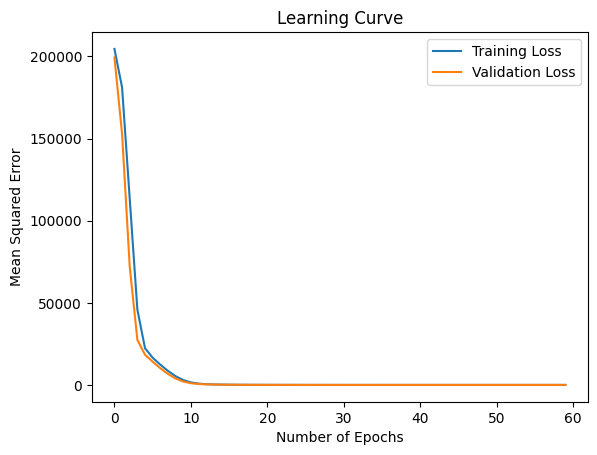

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [31]:
model.evaluate(x_train, y_train)

239/239 [==============================] - 1s 3ms/step - loss: 20.4693 - mae: 3.5447


[20.469341278076172, 3.5447070598602295]

In [32]:
model.evaluate(x_test, y_test)

60/60 [==============================] - 0s 3ms/step - loss: 20.3457 - mae: 3.5679


[20.345678329467773, 3.567866086959839]

### Predict the result for train and test

In [33]:
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

60/60 [==============================] - 0s 2ms/step


In [34]:
# Actual Value
y_train.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [35]:
# Predicted Value
ypred_train[0:5]

array([[452.80426],
       [479.33075],
       [469.48337],
       [431.3543 ],
       [468.0962 ]], dtype=float32)

In [36]:
y_test.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [37]:
ypred_test[0:5]

array([[426.61945],
       [481.79315],
       [484.31503],
       [450.8565 ],
       [448.37643]], dtype=float32)

In [38]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(y_train, ypred_train)

0.9287837479189743

In [39]:
# R2 Score in test
r2_score(y_test, ypred_test)

0.9325832527430573

#### Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [40]:
url2 = "https://raw.githubusercontent.com/Shivam4681/DeepLearning/main/Datasets.txt/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [41]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [42]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [43]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 2ms/step


array([[445.9785 ],
       [438.50018],
       [434.5402 ],
       [440.25363],
       [475.11862]], dtype=float32)

In [44]:
xnew["PowerOutput_pred"] = preds
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.978485
1,28.88,54.89,1007.16,46.60,438.500183
2,27.89,73.21,1001.32,85.88,434.540192
3,25.69,62.26,1011.38,74.08,440.253632
4,12.16,40.81,1025.79,70.97,475.118622
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.027344
96,11.78,39.96,1011.37,82.95,472.674988
97,5.62,41.38,1020.91,86.21,485.442993
98,24.96,74.99,1008.25,80.52,437.113342


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

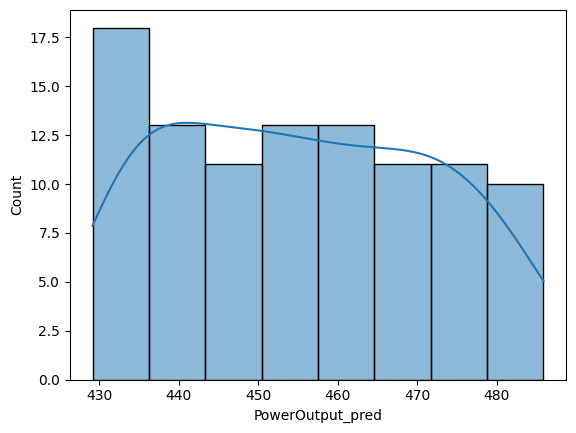

In [45]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [46]:
xnew.to_csv('Result.csv', index=False)